# Final Project
### These data reflect information that has been reported to the California Safe Cosmetics Program (CSCP) in the California Department of Public Health (CDPH). 
### The primary purpose of the CSCP is to collect information on hazardous and potentially hazardous ingredients in cosmetic products sold in California and to make this information available to the public. 

#### Questions ####
1. What are the 5 most common chemicals in the beauty products?
2. What is the distribution for the primary category (class?
3. Which product category (class) contain the 5 most common chemicals?
4.  What is the distribution of the top 5 chemicals in the  top 10 brands (by count)?

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import re
from tabulate import tabulate

In [6]:
df = pd.read_csv("C:/Users/pmush/OneDrive/Desktop/Data Science Prog/final project/cscpopendata.csv")

In [7]:
display(df.head())

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,6/17/2009,8/28/2013,2/1/2011,7/9/2009,7/9/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),7/1/2009,7/1/2009,NaN,7/1/2009,7/1/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,7/1/2009,7/1/2009,NaN,7/2/2009,7/2/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,7/9/2009,8/28/2013,NaN,7/9/2009,7/9/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,7/9/2009,8/28/2013,2/1/2011,7/9/2009,7/9/2009,NaN,1


In [8]:
display(df.tail())

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
114626,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114627,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114628,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114629,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114630,41524,OLD SPICE GENTLEMENS BLEND ALOE AND WILD SAGE ...,NaN,NaN,86,The Procter & Gamble Company,Old Spice,6,Bath Products,159,...,13463-67-7,68074,Titanium dioxide,6/23/2020,6/23/2020,NaN,6/23/2020,6/23/2020,NaN,1


In [13]:
display(df.shape)

(114631, 22)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114631 entries, 0 to 114630
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114631 non-null  int64  
 1   ProductName             114631 non-null  object 
 2   CSFId                   80660 non-null   float64
 3   CSF                     80235 non-null   object 
 4   CompanyId               114631 non-null  int64  
 5   CompanyName             114631 non-null  object 
 6   BrandName               114625 non-null  object 
 7   PrimaryCategoryId       114631 non-null  int64  
 8   PrimaryCategory         114631 non-null  object 
 9   SubCategoryId           114631 non-null  int64  
 10  SubCategory             114631 non-null  object 
 11  CasId                   114631 non-null  int64  
 12  CasNumber               108155 non-null  object 
 13  ChemicalId              114631 non-null  int64  
 14  ChemicalName        

In [17]:
df.count()

CDPHId                    114631
ProductName               114631
CSFId                      80660
CSF                        80235
CompanyId                 114631
CompanyName               114631
BrandName                 114625
PrimaryCategoryId         114631
PrimaryCategory           114631
SubCategoryId             114631
SubCategory               114631
CasId                     114631
CasNumber                 108155
ChemicalId                114631
ChemicalName              114631
InitialDateReported       114631
MostRecentDateReported    114631
DiscontinuedDate           12919
ChemicalCreatedAt         114631
ChemicalUpdatedAt         114631
ChemicalDateRemoved         2985
ChemicalCount             114631
dtype: int64

In [19]:
df.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33971
CSF                        34396
CompanyId                      0
CompanyName                    0
BrandName                      6
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101712
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111646
ChemicalCount                  0
dtype: int64

In [21]:
missing = (df.isnull().mean() * 100).round(2)
missing

CDPHId                     0.00
ProductName                0.00
CSFId                     29.64
CSF                       30.01
CompanyId                  0.00
CompanyName                0.00
BrandName                  0.01
PrimaryCategoryId          0.00
PrimaryCategory            0.00
SubCategoryId              0.00
SubCategory                0.00
CasId                      0.00
CasNumber                  5.65
ChemicalId                 0.00
ChemicalName               0.00
InitialDateReported        0.00
MostRecentDateReported     0.00
DiscontinuedDate          88.73
ChemicalCreatedAt          0.00
ChemicalUpdatedAt          0.00
ChemicalDateRemoved       97.40
ChemicalCount              0.00
dtype: float64

In [23]:
df.duplicated().sum()

254

In [25]:
unique_values = df['ChemicalName'].unique()
print(unique_values)

['Titanium dioxide' 'Distillates (coal tar)' 'Estragole'
 'Cocamide diethanolamine' 'Toluene' 'Chromium (hexavalent compounds)'
 'Retinol'
 'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.'
 'Vitamin A' 'Vitamin A palmitate' 'Butylated hydroxyanisole'
 'Coffea arabica extract' 'Lauramide diethanolamine' 'Coffee'
 'Silica, crystalline (airborne particles of respirable size)'
 'Carbon black (airborne, unbound particles of respirable size)'
 'Carbon black' 'Genistein (purified)' 'Progesterone'
 '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)'
 'Methyleugenol' 'Carbon-black extracts' 'Retinyl palmitate'
 'o-Phenylphenol' 'Acrylamide' 'Formaldehyde (gas)'
 'Ginkgo biloba extract' 'Mica' 'Ethylene glycol'
 'Acetic acid, retinyl ester' 'Ethyl acrylate' 'Trade Secret' 'Methanol'
 'Mineral oils, untreated and mildly treated' 'Diethanolamine'
 'TEA-Lauryl Sulfate' 'Retinyl acetate' 'Lead acetate' 'Talc'
 'Triethanolamine' 'o-Ph

## Data Cleaning ##
The following issues from the initial EDA will be addressed in this section of data cleaning:

* missing values
* duplicate rows
* columns that are not useful for this analysis which also have a lot of missing data
* column names that are too long
* value names that were too long and would interfer with plotting

### Solutions
* research on the internet and look into the data to get the missing data
* delete duplicate rows which are 254 of the total 114 635 rows
* create a subset (dataframe) with the columns that will be used in the analysis
* renaming columns and value names to make them shorter

### Assumptions
* Missing values in the Brand Name column were filled with brand name already in the dataset for that company
* The company name was used in place of the missing brand name where a brand name could not be found in order to avoid loss of data

 

In [28]:
# delete the duplicates but keep first
df = df.drop_duplicates(keep='first')
df


,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,6/17/2009,8/28/2013,2/1/2011,7/9/2009,7/9/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),7/1/2009,7/1/2009,NaN,7/1/2009,7/1/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,7/1/2009,7/1/2009,NaN,7/2/2009,7/2/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,7/9/2009,8/28/2013,NaN,7/9/2009,7/9/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,7/9/2009,8/28/2013,2/1/2011,7/9/2009,7/9/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114626,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114627,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114628,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1
114629,41523,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,6/19/2020,6/19/2020,NaN,6/19/2020,6/19/2020,NaN,1


In [34]:
#subset of only the columns required to answer the questions
data = df[['ProductName', 'CompanyName', 'BrandName', 'ChemicalName', 'PrimaryCategory', 'SubCategory' ]]
data

,ProductName,CompanyName,BrandName,ChemicalName,PrimaryCategory,SubCategory
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
1,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Distillates (coal tar),Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim)
2,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Estragole,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim)
3,PRECISION GLIMMER EYE LINER-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),Lip Gloss/Shine
...,...,...,...,...,...,...
114626,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114627,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114628,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114629,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"


In [38]:
#renaming columns to make them shorter
data = data.rename(columns = {'ProductName':'Product', 'CompanyName':'Company','BrandName':'Brand',
       'ChemicalName':'Chemical', 'PrimaryCategory' : 'Class', 'SubCategory' :'Use'})
data

,Product,Company,Brand,Chemical,Class,Use
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
1,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Distillates (coal tar),Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim)
2,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Estragole,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim)
3,PRECISION GLIMMER EYE LINER-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),Lip Gloss/Shine
...,...,...,...,...,...,...
114626,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114627,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114628,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114629,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"


In [40]:
#scanning for long column names
unique_values = data['Chemical'].unique()
unique_values

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

In [51]:
data['Chemical'] = data['Chemical'].replace({
    'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.': 'Retinol/retinyl esters',
    'Silica, crystalline (airborne particles of respirable size)': 'Silica'
})
data

,Product,Company,Brand,Chemical,Class,Use
0,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
1,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Distillates (coal tar),Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim)
2,Glover's Medicated Shampoo,J. Strickland & Co.,Glover's,Estragole,Hair Care Products (non-coloring),Hair Shampoos (making a cosmetic claim)
3,PRECISION GLIMMER EYE LINER-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),Eyeliner/Eyebrow Pencils
4,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES,New Avon LLC,AVON,Titanium dioxide,Makeup Products (non-permanent),Lip Gloss/Shine
...,...,...,...,...,...,...
114626,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114627,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114628,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"
114629,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,"Yanbal USA, Inc",YANBAL,Titanium dioxide,Makeup Products (non-permanent),"Lip Color - Lipsticks, Liners, and Pencils"


## Question 1
### What are the 5 most common chemicals in the beauty products?
The 5 chemicals found in many beauty products are:
* Titanium dioxide
* Silica, crystalline
* Retinol/retinyl esters
* Mica                                                                                                 
* Butylated hydroxyanisole

 ### Of these five, Titanium dioxide is the most abundant occurring 93476 times. That translates to 82% of the products.

In [53]:
chemical_counts = data['Chemical'].value_counts(dropna=False)
chemical_counts

Chemical
Titanium dioxide            93476
Silica                       2816
Retinol/retinyl esters       2154
Mica                         1918
Butylated hydroxyanisole     1888
                            ...  
Acetylsalicylic acid            1
2-Propyleneacrolein             1
Spironolactone                  1
Extract of coffee bean          1
N-Nitrosodiethanolamine         1
Name: count, Length: 123, dtype: int64

## Question 2
### What is the distribution for the primary category (class)?
#### 66% of all the products are non- permanent makeup products and 13% are in the nail products class
#### That makes 79% of all the products in the dataset

In [55]:
class_counts = data['Class'].value_counts(dropna=False)
class_counts

Class
Makeup Products (non-permanent)      75820
Nail Products                        15346
Skin Care Products                    7680
Sun-Related Products                  4939
Bath Products                         3462
Hair Coloring Products                1882
Hair Care Products (non-coloring)     1566
Tattoos and Permanent Makeup          1477
Personal Care Products                 765
Fragrances                             644
Oral Hygiene Products                  525
Shaving Products                       222
Baby Products                           49
Name: count, dtype: int64

In [120]:
sns.set_style("white", {'axes.facecolor': '#f5f5f5', 'grid.color': 'white'})

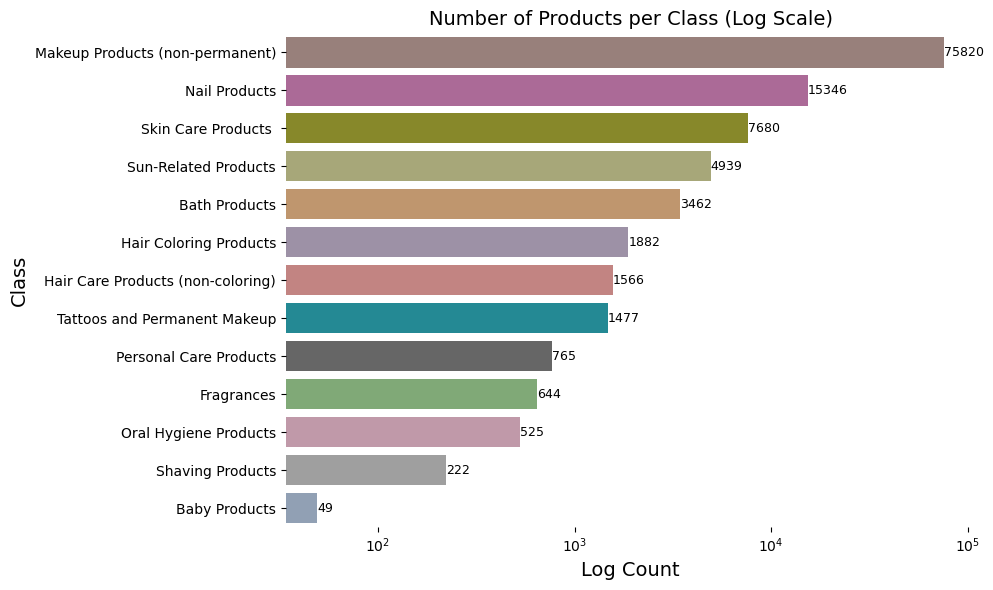

In [61]:
# Slightly darken a hex color
def darken_color(color, factor=0.8):
    return mcolors.to_hex([max(0, c * factor) for c in mcolors.hex2color(color)])

# Prepare class-color mapping
unique_classes = sorted(data['Class'].unique())
n_classes = len(unique_classes)

# Use tab20 and exclude reddish tones
palette = [c for i, c in enumerate(sns.color_palette("tab20")) if i not in {0, 2, 4, 6, 8, 10}]
palette = [darken_color(mcolors.to_hex(c)) for c in palette[:n_classes]]
class_color_map = dict(zip(unique_classes, palette))

# Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    y='Class', hue='Class', data=data,
    order=data['Class'].value_counts().index,
    palette=class_color_map, legend=False
)
ax.set_xscale('log')

# Remove x-axis ticks
ax.tick_params(axis='x', which='minor', bottom=False, top=False, labelbottom=False)

# Add labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9)

plt.title('Number of Products per Class (Log Scale)', fontsize=14)
plt.xlabel('Log Count', fontsize=14)
plt.ylabel('Class', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Question 3
### Which product category (class) contain the 5 most common chemicals?
#### The classes (9/13) that contain all five chemicals are:  
**Hair Care Products**  
**Sun-Related Products**  
**Personal Care Products**  
**Shaving Products**  
**Skin Care Products**  
**Makeup Products**  
**Nail Products**  
**Bath Products**  
**Fragrances**  


#### The relative frequencies show that titanium is widely used in all the product classes.
#### Retinol/retinyl esters	is found in a significant proportion of the products particularly in Personal Care Products, Shaving Products, Skin Care Products and baby products.

In [63]:
#taking a subset
chemical_class = data[['Class', 'Chemical']]
chemical_class

,Class,Chemical
0,Makeup Products (non-permanent),Titanium dioxide
1,Hair Care Products (non-coloring),Distillates (coal tar)
2,Hair Care Products (non-coloring),Estragole
3,Makeup Products (non-permanent),Titanium dioxide
4,Makeup Products (non-permanent),Titanium dioxide
...,...,...
114626,Makeup Products (non-permanent),Titanium dioxide
114627,Makeup Products (non-permanent),Titanium dioxide
114628,Makeup Products (non-permanent),Titanium dioxide
114629,Makeup Products (non-permanent),Titanium dioxide


In [69]:
# Select 5 chemicals, including renamed ones like 'Silica' and 'Retinol/retinyl esters'
selected_chemicals = [
    'Silica',
    'Retinol/retinyl esters',
    'Titanium dioxide',
    'Mica',                                                                                                    
    'Butylated hydroxyanisole'
]

# Filter for these 5 chemicals
subset = data[data['Chemical'].isin(selected_chemicals)]
# Build contingency table

contingency_table = pd.crosstab(subset['Class'], subset['Chemical'])
contingency_table_copy = contingency_table.copy()
contingency_table

Chemical,Butylated hydroxyanisole,Mica,Retinol/retinyl esters,Silica,Titanium dioxide
Class,,,,,
Baby Products,1,0,4,0,22
Bath Products,17,2,73,64,2113
Fragrances,43,3,12,25,437
Hair Care Products (non-coloring),12,6,32,3,535
Hair Coloring Products,0,5,0,3,1555
Makeup Products (non-permanent),1540,1752,907,1799,64942
Nail Products,51,71,201,817,12884
Oral Hygiene Products,0,0,0,18,497
Personal Care Products,17,1,189,3,232


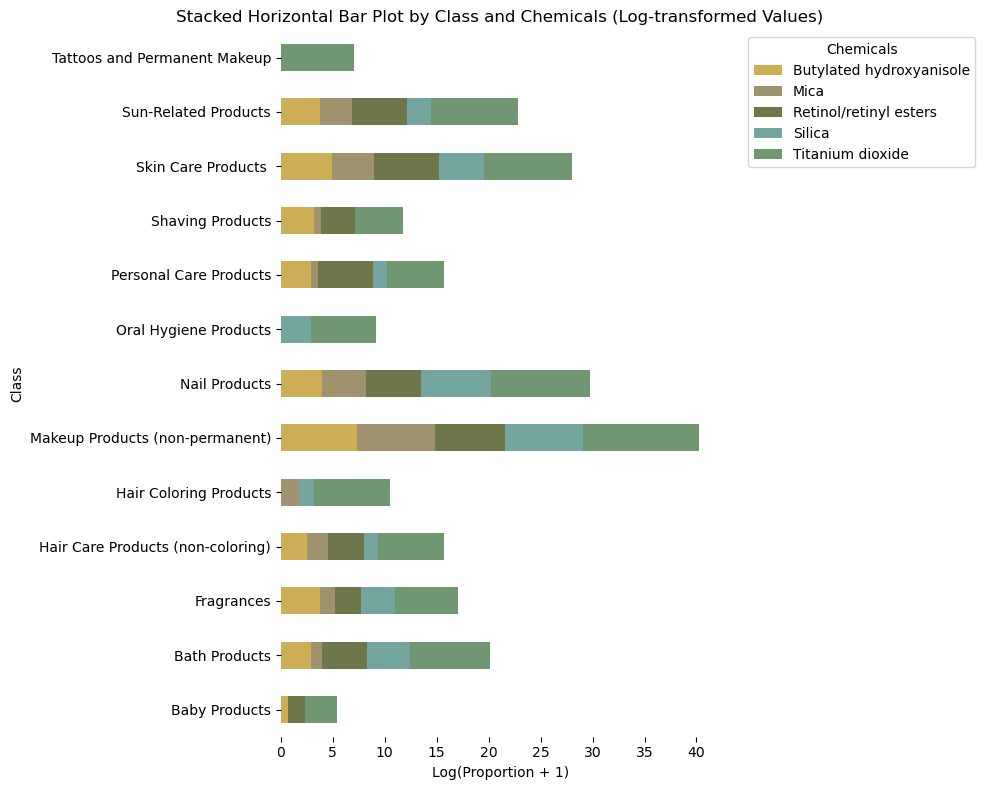

In [71]:
# Log transformation (log(x + 1) to handle zeros)
log_table = np.log1p(contingency_table_copy)

# Plot setup
fig, ax = plt.subplots(figsize=(12, 8))
log_table.plot(kind='barh', stacked=True, color=['#CCAE56', '#9F926E', '#6F7649', '#74A59E', '#709771'], ax=ax)

# Titles and labels
ax.set(title='Stacked Horizontal Bar Plot by Class and Chemicals (Log-transformed Values)',
       xlabel='Log(Proportion + 1)',
       ylabel='Class')

# Legend placement
ax.legend(title='Chemicals', bbox_to_anchor=(1.05, 1), loc='upper left')

# Clean up the plot
sns.despine(left=True, bottom=True)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

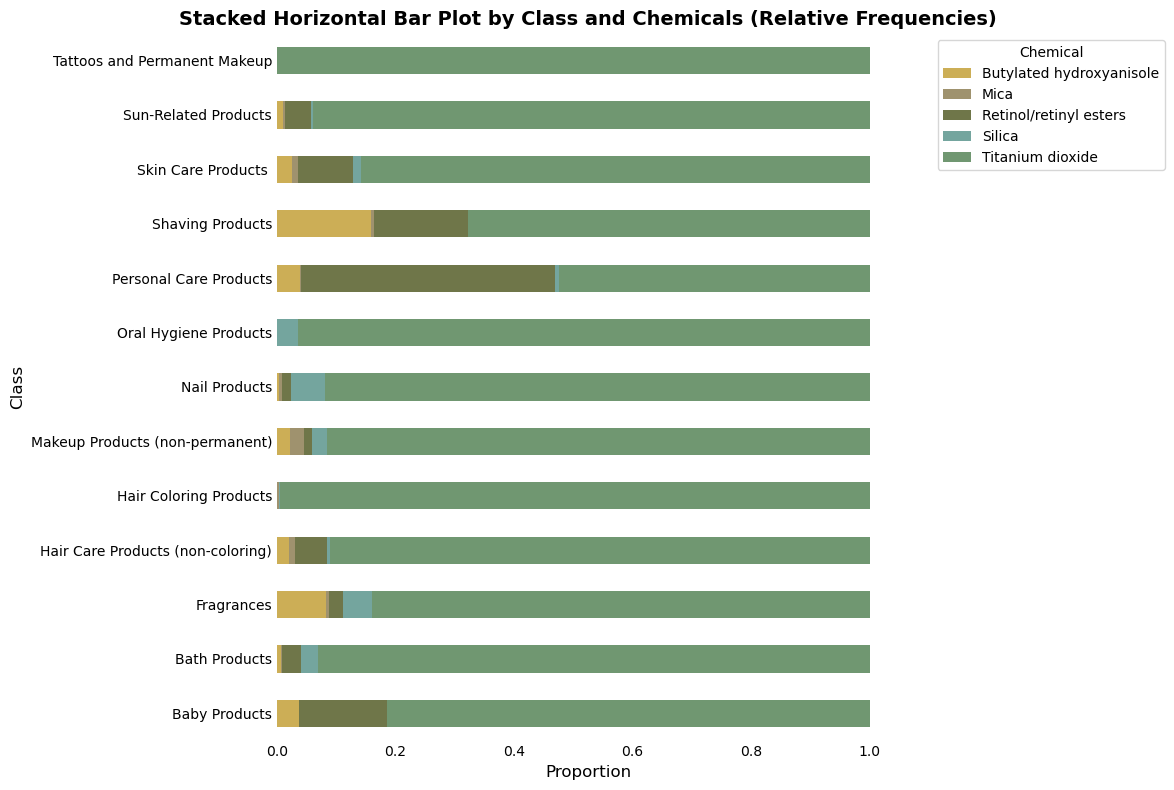

In [73]:

# Normalize the contingency table by row (relative frequencies)
relative_table = contingency_table_copy.div(contingency_table_copy.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(12, 8))
relative_table.plot(kind='barh', stacked=True, color=['#CCAE56', '#9F926E', '#6F7649', '#74A59E', '#709771'], ax=plt.gca())

# Title and labels
plt.title('Stacked Horizontal Bar Plot by Class and Chemicals (Relative Frequencies)', fontsize=14, weight='bold')
plt.xlabel('Proportion', fontsize=12)
plt.ylabel('Class', fontsize=12)

# Clean up the plot
sns.despine(left=True, bottom=True)
plt.tick_params(axis='both', which='both', length=0)  # Remove ticks
plt.legend(title='Chemical', bbox_to_anchor=(1.05, 1), loc='upper left')

# Final adjustments
plt.tight_layout()
plt.show()

## Question 4: What is the distribution of the top 5 chemicals in the  top 10 brands (by count)?
#### All brands have **1300+** products containing titanium dioxide
#### **1014** Charlotte Tilbury products contain silica
#### NARS, NYX and Sally Hansen have Butylated hydroxyanisole
#### There are **544** Sephora products with Mica
#### **329** Victoria's Secret Beauty products have Retinol/retinyl esters 

In [77]:
company_brands = data[['Company', 'Brand', 'Chemical']]
company_brands

,Company,Brand,Chemical
0,New Avon LLC,AVON,Titanium dioxide
1,J. Strickland & Co.,Glover's,Distillates (coal tar)
2,J. Strickland & Co.,Glover's,Estragole
3,New Avon LLC,AVON,Titanium dioxide
4,New Avon LLC,AVON,Titanium dioxide
...,...,...,...
114626,"Yanbal USA, Inc",YANBAL,Titanium dioxide
114627,"Yanbal USA, Inc",YANBAL,Titanium dioxide
114628,"Yanbal USA, Inc",YANBAL,Titanium dioxide
114629,"Yanbal USA, Inc",YANBAL,Titanium dioxide


In [79]:
class_counts = company_brands['Brand'].value_counts(dropna=False)
class_counts

Brand
SEPHORA              3394
NYX                  3227
bareMinerals         3158
Charlotte Tilbury    2451
Revlon               2335
                     ... 
LESSE                   1
 Chic & Sassy           1
Yes to Tomatoes         1
MEDILOOK                1
Dax Hair Care           1
Name: count, Length: 2718, dtype: int64

In [233]:
top_10_brands= company_brands['Brand'].value_counts().head(10)

top_10_brands

Brand
SEPHORA                     3394
NYX                         3227
bareMinerals                3158
Charlotte Tilbury           2451
Revlon                      2335
NARS                        2185
Victoria's Secret Beauty    2115
tarte                       2101
Sally Hansen                1834
Sephora                     1767
Name: count, dtype: int64

In [118]:
from tabulate import tabulate

# Top 10 brands and Top 5 chemicals
top_10_brands = company_brands['Brand'].value_counts().head(10).index
top_5_chemicals = company_brands['Chemical'].value_counts().head(5).index

# Filter the DataFrame based on top brands and chemicals
filtered_df = company_brands[company_brands['Brand'].isin(top_10_brands) & company_brands['Chemical'].isin(top_5_chemicals)]

# Create the contingency table with frequency counts
contingency_table1 = pd.crosstab(filtered_df['Brand'], filtered_df['Chemical'])

# Display the contingency table in a pretty format
print(tabulate(contingency_table1, headers='keys', tablefmt='pretty'))

+--------------------------+--------------------------+------+------------------------+--------+------------------+
|          Brand           | Butylated hydroxyanisole | Mica | Retinol/retinyl esters | Silica | Titanium dioxide |
+--------------------------+--------------------------+------+------------------------+--------+------------------+
|    Charlotte Tilbury     |            0             |  0   |           0            |  1014  |       1421       |
|           NARS           |           114            |  0   |           0            |   0    |       2050       |
|           NYX            |           1124           |  0   |           0            |   0    |       2031       |
|          Revlon          |            0             |  0   |           0            |   0    |       2299       |
|         SEPHORA          |            0             | 544  |           0            |   0    |       2298       |
|       Sally Hansen       |            33            |  0   |          

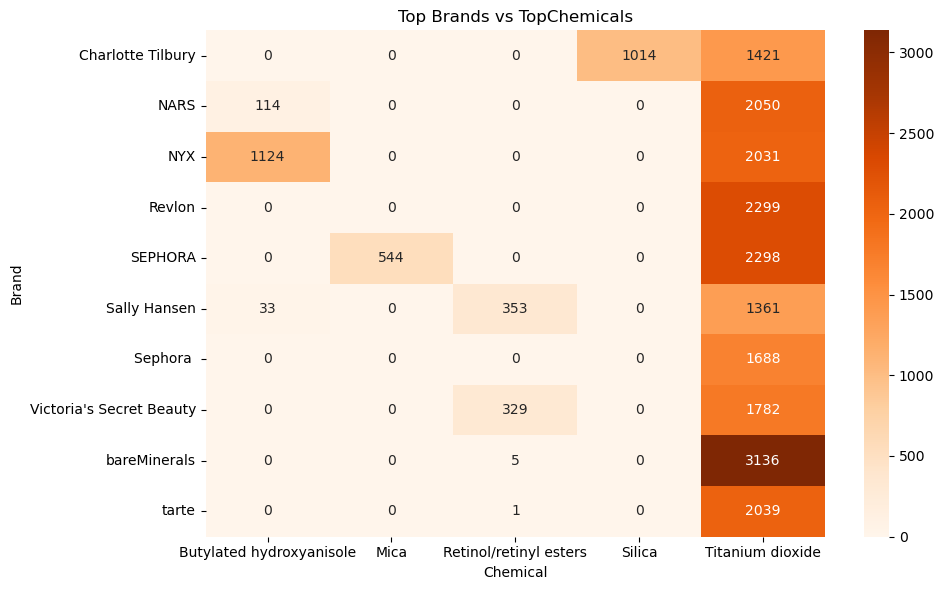

In [138]:

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table1, annot=True, fmt='d', cmap='Oranges')
plt.title('Top Brands vs TopChemicals')
plt.xlabel('Chemical')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

## Reference ##
1. Chemicals in Cosmetics - Dataset - California Health and Human Services Open Data Portal 
2. Deitel, P., & Deitel, H. (2020). Intro to Python for computer science and data science: Learning to program with AI, big data and the cloud. (1st ed.).Pearson.
3. https://chatgpt.com/
   